In [5]:
import piplite

# Install Seaborn using piplite
await piplite.install("seaborn")


In [7]:
import pandas as pd

# Use the correct relative file path to the uploaded CSV file
file_path = 'Mall_Customers.csv'  # Since it's in the 'notebooks' directory

# Load the dataset
data = pd.read_csv(file_path)




In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data analysis

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.shape


(200, 5)

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The following code confirms that our dataset is clean and doesn't contain any missing values.
This provides a solid foundation for proceeding with data exploration and clustering analysis

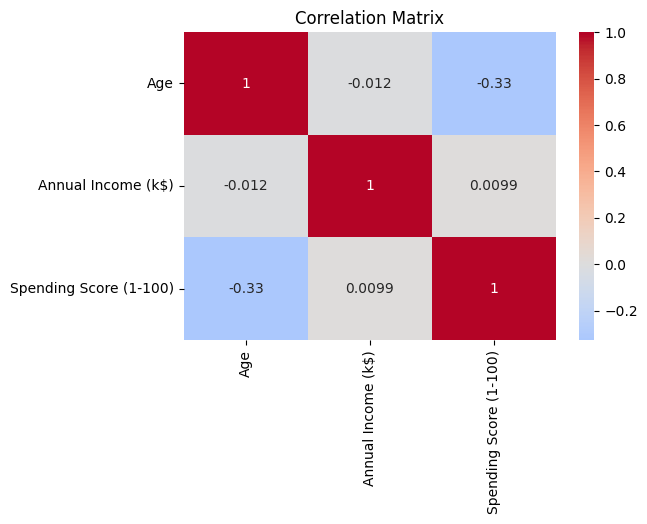

In [21]:
# Remove the 'CustomerID' column from the dataset
data_without_id = data.drop(columns=['CustomerID'])

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr(numeric_only=True)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


The off-diagonal cells show the correlation coefficients between pairs of variables. For example, the correlation between "Age" and "Spending Score (1-100)" is approximately -0.327227, indicating a negative correlation between these two variables.
You can interpret these values as discussed earlier. For instance, the negative correlation between "Age" and "Spending Score" suggests that, on average, as the age of customers increases, their spending score tends to decrease.

In [23]:
# Finding the number of males and females in the data
data.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

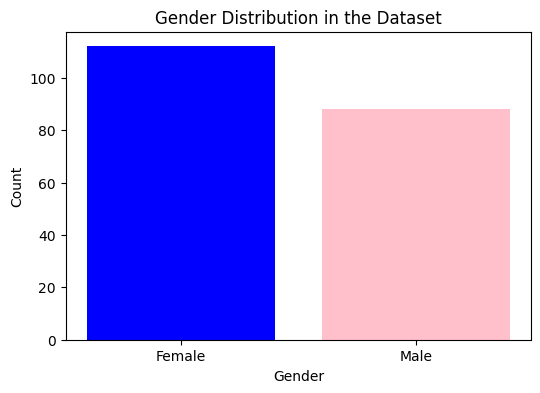

In [27]:
# Finding the number of males and females in the data
gender_counts = data.Genre.value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in the Dataset')
plt.show()


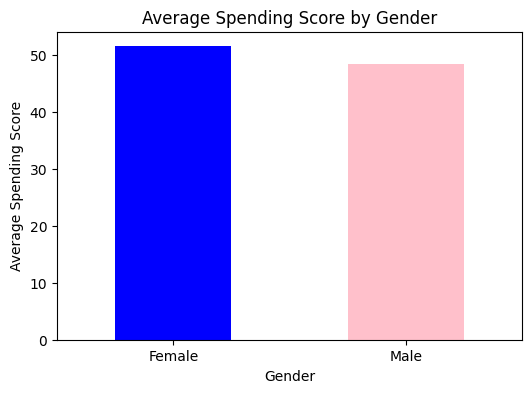

In [39]:
import matplotlib.pyplot as plt

# Calculate the average spending score for each gender
average_spending_by_gender = data.groupby('Genre')['Spending Score (1-100)'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))
average_spending_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.xticks(rotation=0)
plt.show()


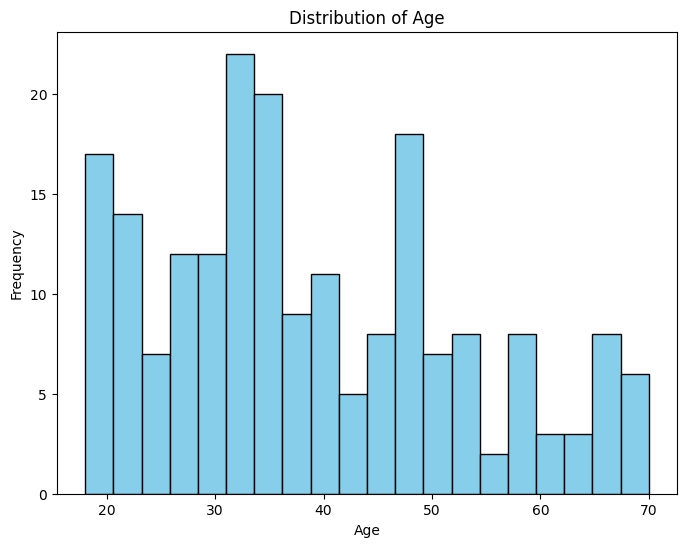

In [31]:
import matplotlib.pyplot as plt

# Create a histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [32]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()
std_dev_age = data['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}")


Mean Age: 38.85
Median Age: 36.00
Standard Deviation of Age: 13.97


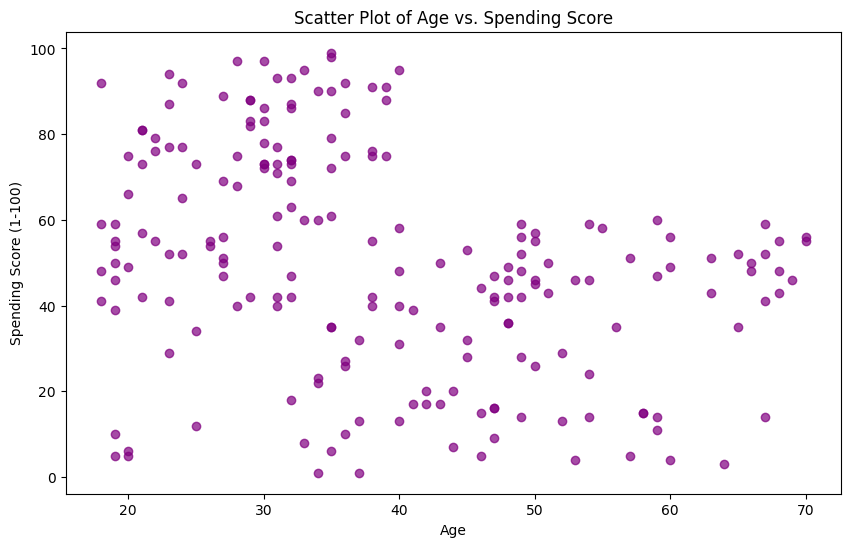

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], color='purple', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs. Spending Score')
plt.show()


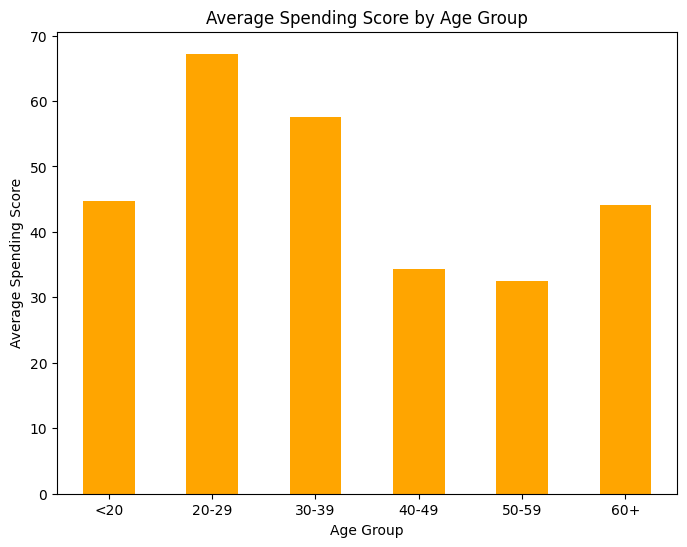

In [34]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate average spending score for each age group
average_spending_by_age_group = data.groupby('Age Group')['Spending Score (1-100)'].mean()

# Create a bar plot for average spending by age group
plt.figure(figsize=(8, 6))
average_spending_by_age_group.plot(kind='bar', color='orange')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Age Group')
plt.xticks(rotation=0)
plt.show()


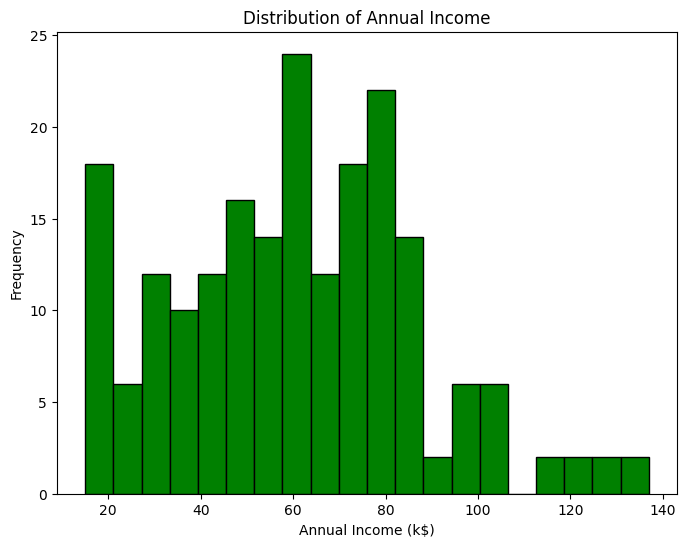

In [35]:
import matplotlib.pyplot as plt

# Create a histogram for Annual Income
plt.figure(figsize=(8, 6))
plt.hist(data['Annual Income (k$)'], bins=20, color='green', edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()


In [36]:
mean_income = data['Annual Income (k$)'].mean()
median_income = data['Annual Income (k$)'].median()
std_dev_income = data['Annual Income (k$)'].std()

print(f"Mean Annual Income: {mean_income:.2f} k$")
print(f"Median Annual Income: {median_income:.2f} k$")
print(f"Standard Deviation of Annual Income: {std_dev_income:.2f} k$")


Mean Annual Income: 60.56 k$
Median Annual Income: 61.50 k$
Standard Deviation of Annual Income: 26.26 k$


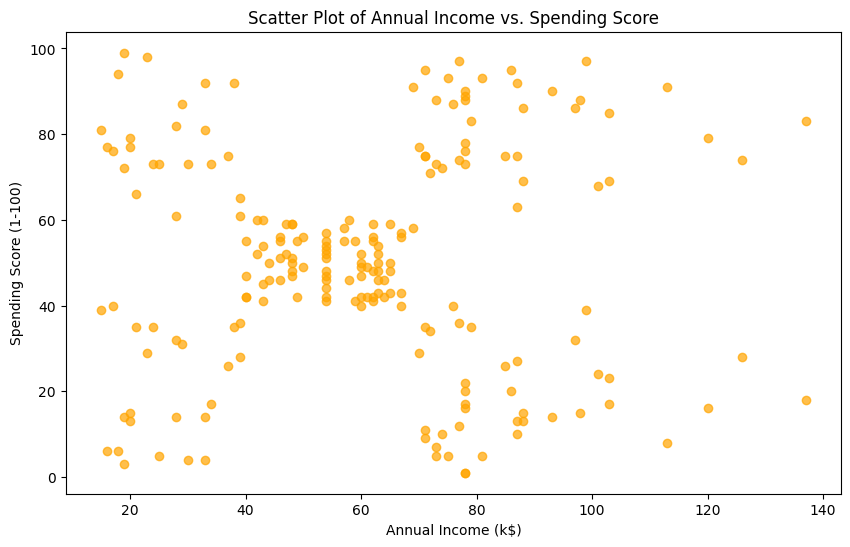

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='orange', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()


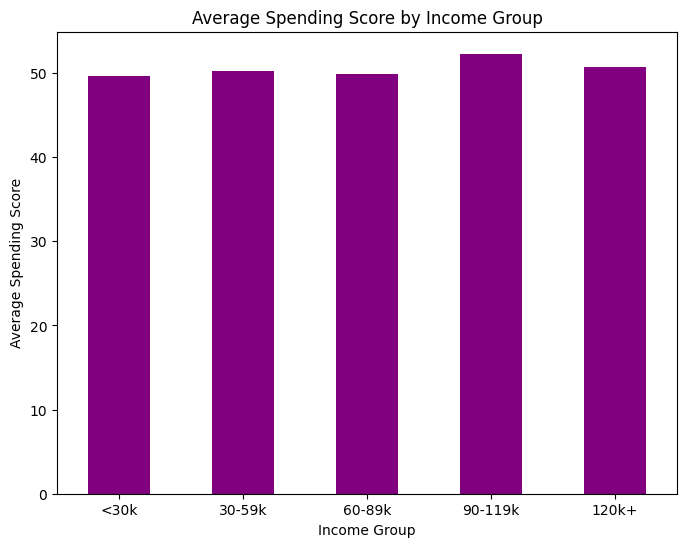

In [38]:
# Create income groups
income_bins = [0, 30, 60, 90, 120, float('inf')]
income_labels = ['<30k', '30-59k', '60-89k', '90-119k', '120k+']
data['Income Group'] = pd.cut(data['Annual Income (k$)'], bins=income_bins, labels=income_labels)

# Calculate average spending score for each income group
average_spending_by_income_group = data.groupby('Income Group')['Spending Score (1-100)'].mean()

# Create a bar plot for average spending by income group
plt.figure(figsize=(8, 6))
average_spending_by_income_group.plot(kind='bar', color='purple')
plt.xlabel('Income Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Income Group')
plt.xticks(rotation=0)
plt.show()


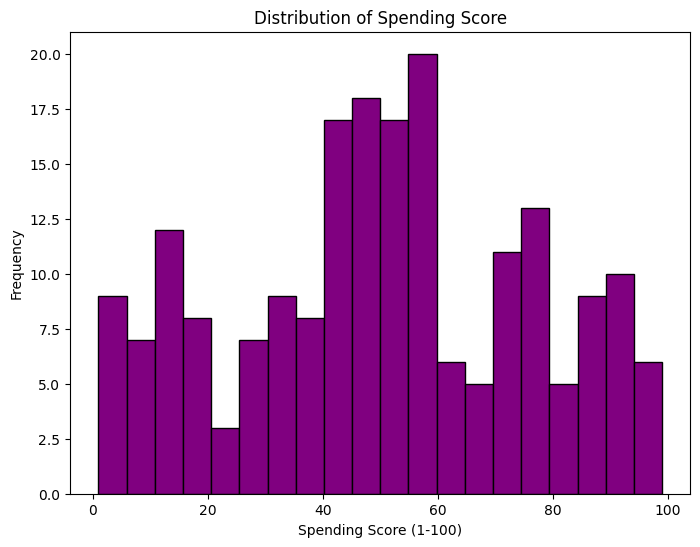

In [40]:
import matplotlib.pyplot as plt

# Create a histogram for Spending Score
plt.figure(figsize=(8, 6))
plt.hist(data['Spending Score (1-100)'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()


In [41]:
mean_spending = data['Spending Score (1-100)'].mean()
median_spending = data['Spending Score (1-100)'].median()
std_dev_spending = data['Spending Score (1-100)'].std()

print(f"Mean Spending Score: {mean_spending:.2f}")
print(f"Median Spending Score: {median_spending:.2f}")
print(f"Standard Deviation of Spending Score: {std_dev_spending:.2f}")


Mean Spending Score: 50.20
Median Spending Score: 50.00
Standard Deviation of Spending Score: 25.82


K-Means Clustering
Making clusters based on Annual income and Spending Score.

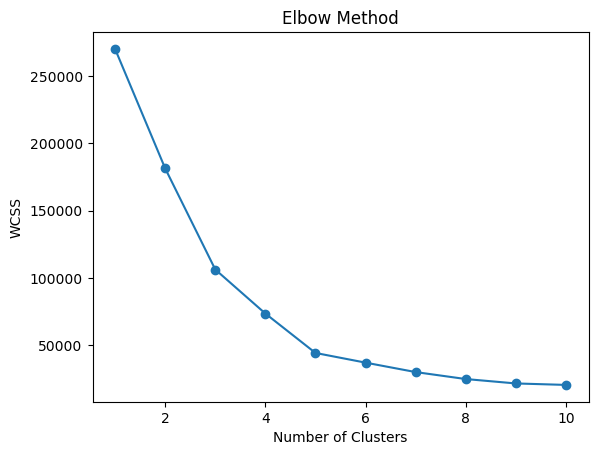

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Taking annual income and spending score in x to make clusters
x=data.iloc[:,[3,4]]
# List to store Within Cluster Sum of Squares (WCSS) values
wcss = []

# Iterate over a range of cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)  # Assuming 'x' represents your feature data
    wcss.append(kmeans.inertia_)  # Append WCSS value to the list

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


So the optimal number of clusters = 5

In [52]:
from sklearn.cluster import KMeans

# Taking annual income and spending score in x to make clusters
x = data.iloc[:, [3, 4]]

# Chosen optimal number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and get cluster labels
cluster_labels = kmeans.fit_predict(x)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels


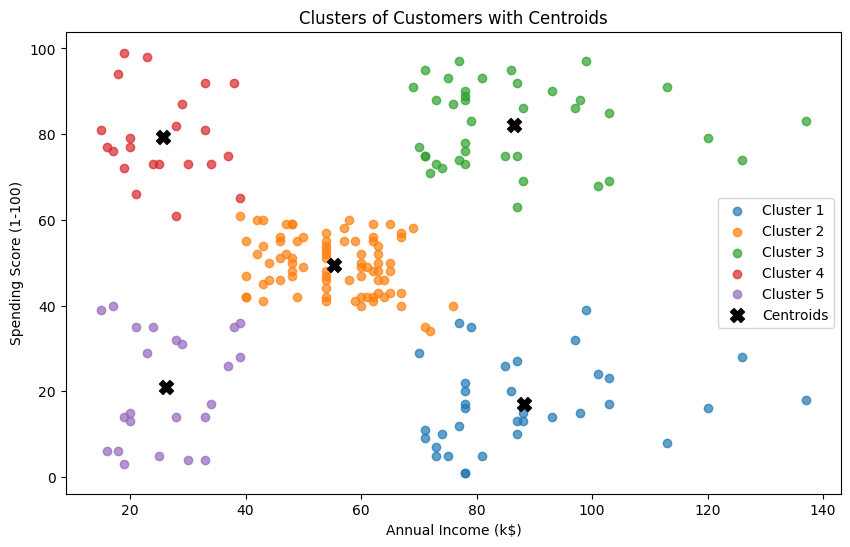

In [56]:
import matplotlib.pyplot as plt

# Scatter plot of 'Annual Income' vs 'Spending Score', colored by cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_id + 1}', alpha=0.7)

# Plot cluster centroids with smaller markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers with Centroids')
plt.legend()
plt.show()


Cluster 1 contains customers with high annual income but low spending score.

Cluster 2 contains customers with average annual income and average spending score.

Cluster 3 contains customers with high annual income and high spending score.

Cluster 4 contains customers with low annual income but high spending score.

Cluster 5 contains customers with low annual income and low spending score.

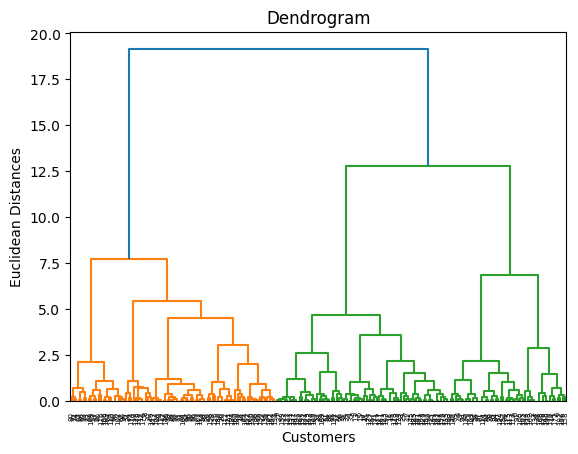

In [67]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch  # Import the hierarchy module from scipy


# Normalize the features
scaler = StandardScaler()
x_age_spending_normalized = scaler.fit_transform(x_age_spending)

# Perform hierarchical clustering using Ward's method on normalized data
dendrogram = sch.dendrogram(sch.linkage(x_age_spending_normalized, method='ward'))

plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.title('Dendrogram')
plt.show()
